# **KNN**

In [61]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve,
                            classification_report, confusion_matrix)
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("income.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [63]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


cleaning null data

In [64]:
df = df.dropna()
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [66]:
data = df

In [67]:
# 2. Preprocessing Data
# Hapus tanda titik dari kolom 'income'
print("Nilai unik pada kolom 'income' sebelum filtering:", data['income'].unique())
data['income'] = data['income'].astype(str).str.replace('.', '', regex=False)

# Bersihkan data: pastikan hanya ada dua kategori di 'income'
data['income'] = data['income'].str.strip()  # Hapus spasi yang tidak diinginkan
data = data[data['income'].isin(['<=50K', '>50K'])]  # Pastikan hanya ada dua kategori
print("Nilai unik pada kolom 'income' setelah filtering:", data['income'].unique())

# Encode variabel kategorikal
le = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Periksa nilai unik pada kolom 'income' setelah encoding
print("Nilai unik pada kolom 'income' setelah encoding:", data['income'].unique())

# Pastikan hanya ada dua kelas
if len(data['income'].unique()) != 2:
    raise ValueError("Kolom 'income' memiliki lebih dari dua kelas setelah encoding!")

Nilai unik pada kolom 'income' sebelum filtering: ['<=50K' '>50K' '<=50K.' '>50K.']
Nilai unik pada kolom 'income' setelah filtering: ['<=50K' '>50K']
Nilai unik pada kolom 'income' setelah encoding: [0 1]


<ipython-input-67-4483a007ea17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = data['income'].astype(str).str.replace('.', '', regex=False)
<ipython-input-67-4483a007ea17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = data['income'].str.strip()  # Hapus spasi yang tidak diinginkan


In [68]:
# 3. Memisahkan fitur dan target
X = data.drop('income', axis=1)
y = data['income']

# 4. Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 7. Membuat prediksi
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

# 8. Periksa distribusi
print("Distribusi y_test:", np.bincount(y_test))
print("Distribusi y_pred:", np.bincount(y_pred))

# 9. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
auc = roc_auc_score(y_test, y_pred_proba)

print("Hasil Evaluasi Model:")
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Distribusi y_test: [10733  3554]
Distribusi y_pred: [11220  3067]
Hasil Evaluasi Model:
Akurasi: 0.8258
Presisi: 0.6736
Recall: 0.5813
F1-Score: 0.6241
AUC: 0.8480

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10733
           1       0.67      0.58      0.62      3554

    accuracy                           0.83     14287
   macro avg       0.77      0.74      0.76     14287
weighted avg       0.82      0.83      0.82     14287


Confusion Matrix:
[[9732 1001]
 [1488 2066]]


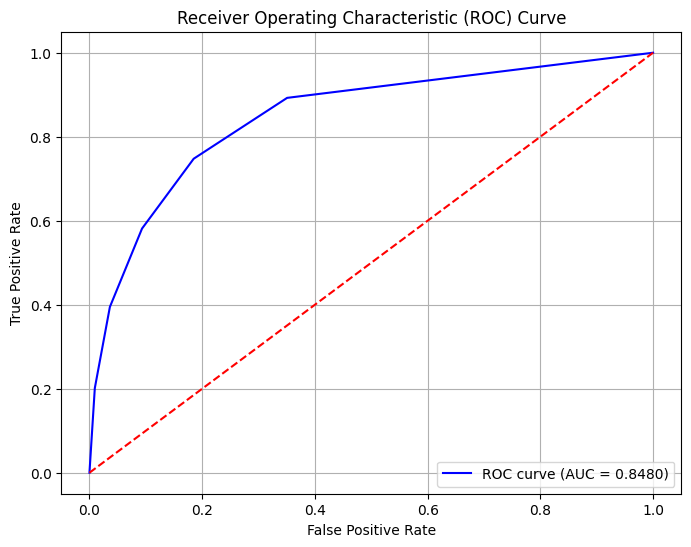

In [69]:
# 10. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **PENJELASAN METRIKS KNN**

1. Akurasi
- Mengukur proporsi prediksi yang benar dari total prediksi.
- Akurasi tinggi (82.58%) menunjukkan bahwa model secara keseluruhan cukup baik dalam memprediksi kelas.
- Namun, akurasi bisa menyesatkan jika data tidak seimbang (misalnya, jika kelas <=50K jauh lebih banyak daripada >50K).
2. Presisi
- Mengukur proporsi prediksi positif yang benar-benar positif (True Positive / (True Positive + False Positive)).
- Presisi 67.36% berarti dari semua prediksi >50K, 67.36% di antaranya benar-benar >50K.
- Presisi penting jika Anda ingin meminimalkan False Positives (misalnya, Anda tidak ingin salah memprediksi seseorang sebagai >50K jika sebenarnya <=50K).
3. Recall
- Mengukur proporsi kasus positif yang berhasil dideteksi (True Positive / (True Positive + False Negative)).
- Recall 58.13% berarti model hanya berhasil mendeteksi 58.13% dari semua kasus >50K yang sebenarnya.
- Recall penting jika Anda ingin meminimalkan False Negatives (misalnya, Anda tidak ingin melewatkan orang yang sebenarnya >50K).
4. F1-score
- Rata-rata harmonik dari presisi dan recall.
- F1-Score 62.41% memberikan keseimbangan antara presisi dan recall.
- F1-Score berguna ketika Anda ingin menyeimbangkan antara presisi dan recall, terutama pada data yang tidak seimbang.
5. AUC
- Area Under the ROC Curve, mengukur kemampuan model untuk membedakan antara kelas positif dan negatif.
- AUC 84.80% menunjukkan bahwa model memiliki kemampuan yang baik untuk membedakan antara <=50K dan >50K.
- AUC lebih tinggi (mendekati 1) berarti model lebih baik dalam membedakan kelas, dan ini adalah metrik yang kuat untuk data yang tidak seimbang.

# **DECISION TREE**

In [71]:
from sklearn.tree import DecisionTreeClassifier  # Mengganti KNN dengan Decision Tree

In [72]:
# 3. Memisahkan fitur dan target
X = data.drop('income', axis=1)
y = data['income']

# 4. Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalisasi data (opsional untuk Decision Tree, tetapi kita tetap lakukan untuk konsistensi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Membuat dan melatih model Decision Tree
dt = DecisionTreeClassifier(random_state=42)  # Menggunakan Decision Tree
dt.fit(X_train_scaled, y_train)

# 7. Membuat prediksi
y_pred = dt.predict(X_test_scaled)
y_pred_proba = dt.predict_proba(X_test_scaled)[:, 1]

# 8. Periksa distribusi
print("Distribusi y_test:", np.bincount(y_test))
print("Distribusi y_pred:", np.bincount(y_pred))

Distribusi y_test: [7170 2355]
Distribusi y_pred: [7114 2411]


In [73]:
# 9. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
auc = roc_auc_score(y_test, y_pred_proba)

print("Hasil Evaluasi Model:")
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Hasil Evaluasi Model:
Akurasi: 0.8098
Presisi: 0.6126
Recall: 0.6272
F1-Score: 0.6198
AUC: 0.7486

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7170
           1       0.61      0.63      0.62      2355

    accuracy                           0.81      9525
   macro avg       0.74      0.75      0.75      9525
weighted avg       0.81      0.81      0.81      9525


Confusion Matrix:
[[6236  934]
 [ 878 1477]]


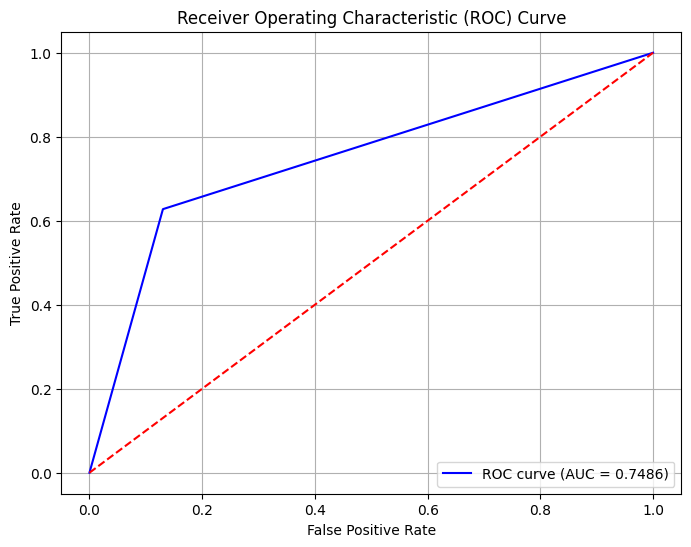

In [74]:
# 10. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **PENJELASAN METRIKS DECISION TREE**

1. Akurasi
- Definisi: Akurasi mengukur proporsi prediksi yang benar dari total prediksi, dihitung sebagai (True Positives + True Negatives) / Total Data.
- asil: 80.98% dari semua prediksi model adalah benar. Ini menunjukkan bahwa model cukup baik secara keseluruhan dalam memprediksi apakah seseorang berpenghasilan <=50K atau >50K.
- Konteks: Namun, akurasi bisa menyesatkan jika data tidak seimbang. Dalam dataset pendapatan, biasanya kelas <=50K lebih dominan, sehingga akurasi tinggi mungkin hanya mencerminkan kemampuan model memprediksi kelas mayoritas.

2. Presisi
- Definisi: Presisi mengukur proporsi prediksi positif yang benar-benar positif, dihitung sebagai True Positives / (True Positives + False Positives).
- Hasil: 61.26% dari semua prediksi >50K yang dibuat oleh model adalah benar. Artinya, dari semua orang yang diprediksi berpenghasilan >50K, 61.26% di antaranya memang benar-benar berpenghasilan >50K.
- Konteks: Presisi yang moderat ini menunjukkan bahwa model masih cukup sering salah memprediksi seseorang sebagai >50K padahal sebenarnya <=50K (False Positives).

3. Recall
- Definisi: Recall mengukur proporsi kasus positif yang berhasil dideteksi, dihitung sebagai True Positives / (True Positives + False Negatives).
- Hasil: 62.72% dari semua kasus >50K yang sebenarnya berhasil dideteksi oleh model. Artinya, model mampu mengidentifikasi 62.72% dari orang-orang yang benar-benar berpenghasilan >50K.
- Konteks: Recall yang moderat ini menunjukkan bahwa model masih melewatkan 37.28% dari kasus >50K (False Negatives), yang berarti beberapa orang yang sebenarnya berpenghasilan >50K diprediksi sebagai <=50K.

4. F1-score
- Definisi: F1-Score adalah rata-rata harmonik dari presisi dan recall, dihitung sebagai 2 * (Presisi * Recall) / (Presisi + Recall).
- Hasil: F1-Score sebesar 61.98% menunjukkan keseimbangan antara presisi dan recall. Nilai ini cukup dekat dengan presisi dan recall, yang menunjukkan bahwa model memiliki performa yang seimbang dalam hal kedua metrik ini.
- Konteks: F1-Score berguna ketika Anda ingin menyeimbangkan antara presisi dan recall, terutama pada data yang tidak seimbang.

5. AUC
- Definisi: AUC (Area Under the ROC Curve) mengukur kemampuan model untuk membedakan antara kelas positif (>50K) dan negatif (<=50K). Nilai AUC berkisar dari 0 hingga 1, dengan 1 menunjukkan model yang sempurna.
- Hasil: AUC sebesar 74.86% menunjukkan bahwa model memiliki kemampuan yang cukup baik untuk membedakan antara <=50K dan >50K, tetapi masih ada ruang untuk perbaikan.
- Konteks: AUC yang lebih tinggi (mendekati 1) menunjukkan model yang lebih baik dalam membedakan kelas. Nilai 0.7486 menunjukkan performa yang wajar, tetapi tidak terlalu tinggi.